### 第一題 [myknn_regressor]

### Q1.1

myknn_regressor初始化並讀進需要的參數 ,<br>
function fit : 把資料讀進class ,<br>
function predict : 計算x之間的距離，處理成zipped list方便排序後取y，再分成2種mode，取出排序列中所需的值

In [2]:
import numpy as np
import pickle
from sklearn import preprocessing

class myknn_regressor():
    def __init__(self, n_neighbors = 10, mean_type = "equal_weight"):
        ### Add your code here ###
        self.n_neighbors = n_neighbors
        self.mean_type = mean_type

    def fit(self, x_train, y_train):
        ### Add your code here ###
        self.x_train = x_train
        self.y_train = y_train

    def predict(self, x_test):
        y_ans = []
        for i in range(len(x_test)) :
            dist_list = []
            y_list = []
            for j in range(len(self.x_train)) :
                dis = (x_test[i]-self.x_train[j])**2
                dis = np.sum(dis)
                dist_list.append(dis)

                y_list.append(self.y_train[j])
            zipped = zip(dist_list, y_list)
            zipped = sorted(zipped)
            sort_list = list(zipped)
            sumy = 0
            if (self.n_neighbors >= 10) and (self.mean_type == "remove_outliers"):
                new_dis, new_y = zip(*zipped)
                re_y = new_y[:self.n_neighbors]
                re_y = sorted(re_y) 
                Q1 = np.percentile(re_y, 25)
                Q3 = np.percentile(re_y, 75)
                IQR = Q3 - Q1
                re_list = []
                for i in range(len(re_y)):
                    if (re_y[i] >= (Q1-1.5*IQR)) and (re_y[i] <= (Q3+1.5*IQR)) :
                        re_list.append(re_y[i])
                        
                for r in re_list:
                    sumy += r
                y_pre = sumy/len(re_list)
                y_ans.append(y_pre)
            else :  
                for r in range(self.n_neighbors):
                    sumy += sort_list[r][1]
                y_pre = sumy/self.n_neighbors
                y_ans.append(y_pre)

        return y_ans

### Q1.2

load資料、以equal_weight模式將資料輸入進myknn、輸出所需結果

In [4]:
with open('msd_data1.pickle', 'rb') as fh1:
    msd_data = pickle.load(fh1)

doscaling = 1

if (doscaling == 1):
    xscaler = preprocessing.StandardScaler().fit(msd_data['X_train'])
    #standardize feature values
    X_train = xscaler.transform(msd_data['X_train'])
    X_test = xscaler.transform(msd_data['X_test'])
else:
    X_train = msd_data['X_train']
    X_test = msd_data['X_test']

Y_train = msd_data['Y_train']
Y_test = msd_data['Y_test']

myknn = myknn_regressor(20)
myknn.fit(X_train, Y_train)
ypred = myknn.predict(X_test)

RMSE = 0
for i in range(len(ypred)):
    RMSE += (ypred[i]-Y_test[i])**2
RMSE /= len(ypred)
RMSE = RMSE**0.5
print("RMSE:")
print(RMSE)
print("first 20 ypred")
print(ypred[:20])

RMSE:
10.251264515495954
first 20 ypred
[1993.35, 1993.8, 2000.65, 1991.5, 1992.8, 1998.5, 1988.1, 1991.65, 2002.25, 2003.0, 2000.5, 1998.65, 1995.55, 1997.2, 1995.05, 1997.4, 1992.15, 2000.45, 2003.2, 1995.75]


得出的RMSE大約為10.25

### Q1.3

load資料、以remove_outliers模式將資料輸入進myknn、輸出所需結果

In [5]:
myknn = myknn_regressor(20, "remove_outliers")      
myknn.fit(X_train, Y_train)
ypred = myknn.predict(X_test)

RMSE = 0
for i in range(len(ypred)):
    RMSE += (ypred[i]-Y_test[i])**2
RMSE /= len(ypred)
RMSE = RMSE**0.5
print("RMSE:")
print(RMSE)
print("first 20 ypred")
print(ypred[:20])

RMSE:
10.212572466080363
first 20 ypred
[1993.35, 1993.8, 2000.65, 1992.7368421052631, 1992.8, 2000.0, 1988.1, 1991.65, 2002.25, 2003.9473684210527, 2000.5, 2000.9444444444443, 1995.55, 1997.2, 1998.611111111111, 1997.4, 1992.15, 2003.8333333333333, 2003.2, 1995.75]


得出的RMSE大約為10.21，相較Q1.2小一些，由此可知，適度的去除一些極端的數值，能夠的降低誤差

### 第二題 [Tuning the Hyper-parameter]

分別使用python內建的knn處理標準化資料、python內建knn處理未標準化資料、myknn處理標準化資料，並在最後畫出結果

In [ ]:
import sklearn
import pandas
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
import pickle
from sklearn import preprocessing
import matplotlib.pyplot as plt

class myknn_regressor():
    def __init__(self, n_neighbors = 10, mean_type = "equal_weight"):
        ### Add your code here ###
        self.n_neighbors = n_neighbors
        self.mean_type = mean_type

    def fit(self, x_train, y_train):
        ### Add your code here ###
        self.x_train = x_train
        self.y_train = y_train

    def predict(self, x_test):
        y_ans = []
        for i in range(len(x_test)) :
            dist_list = []
            y_list = []
            for j in range(len(self.x_train)) :
                dis = (x_test[i]-self.x_train[j])**2
                dis = np.sum(dis)
                dist_list.append(dis)

                y_list.append(self.y_train[j])
            zipped = zip(dist_list, y_list)
            zipped = sorted(zipped)
            sort_list = list(zipped)
            sumy = 0
            if (self.n_neighbors >= 10) and (self.mean_type == "remove_outliers"):
                new_dis, new_y = zip(*zipped)
                re_y = new_y[:self.n_neighbors]
                re_y = sorted(re_y) 
                Q1 = np.percentile(re_y, 25)
                Q3 = np.percentile(re_y, 75)
                IQR = Q3 - Q1
                re_list = []
                for i in range(len(re_y)):
                    if (re_y[i] >= (Q1-1.5*IQR)) and (re_y[i] <= (Q3+1.5*IQR)) :
                        re_list.append(re_y[i])
                        
                for r in re_list:
                    sumy += r
                y_pre = sumy/len(re_list)
                y_ans.append(y_pre)
            else :  
                for r in range(self.n_neighbors):
                    sumy += sort_list[r][1]
                y_pre = sumy/self.n_neighbors
                y_ans.append(y_pre)

        return y_ans
    
klist=[1,2,3,4,5,10,15,20,25,30,35,40,45,50,55,60,80,100,120,140,160,180,200]

with open('msd_data1.pickle', 'rb') as fh1:
    msd_data = pickle.load(fh1)

Y_train = msd_data['Y_train']
Y_test = msd_data['Y_test']

#second
X_train = msd_data['X_train']
X_test = msd_data['X_test']
R_list2 = []
for K in klist:
    knn2 = KNeighborsRegressor(n_neighbors = K) 
    knn2.fit(X_train, Y_train)  #fit the model
    ypred=knn2.predict(X_test) #make prediction on test set
    RMSE = 0
    for i in range(len(ypred)):
        RMSE += (ypred[i]-Y_test[i])**2
    RMSE /= len(ypred)
    RMSE = RMSE**0.5
    R_list2.append(RMSE)
#print("second done")

xscaler = preprocessing.StandardScaler().fit(msd_data['X_train'])
X_train = xscaler.transform(msd_data['X_train'])
X_test = xscaler.transform(msd_data['X_test'])
R_list1 = []
#first, standardized

for K in klist:
    knn1 = KNeighborsRegressor(n_neighbors = K) 
    knn1.fit(X_train, Y_train)  #fit the model
    ypred=knn1.predict(X_test) #make prediction on test set
    RMSE = 0
    for i in range(len(ypred)):
        RMSE += (ypred[i]-Y_test[i])**2
    RMSE /= len(ypred)
    RMSE = RMSE**0.5
    R_list1.append(RMSE)
#print("first done")

#third, my knn
R_list3 = []
for K in klist:
    myknn = myknn_regressor(K, "remove_outliers")
    myknn.fit(X_train, Y_train)
    ypred = myknn.predict(X_test)
    RMSE = 0
    for i in range(len(ypred)):
        RMSE += (ypred[i]-Y_test[i])**2
    RMSE /= len(ypred)
    RMSE = RMSE**0.5
    R_list3.append(RMSE)
#print("third done")

plt.plot(klist, R_list1, 'o-', color = 'r', label = "first")
plt.plot(klist, R_list2, 'o-', color = 'g', label = "second")
plt.plot(klist, R_list3, 'o-', color = 'b', label = "third")
plt.legend(loc = "best", fontsize=20)
plt.xlabel('k')
plt.ylabel('RMSE')
plt.show()

由於第二題結果跑太久，所以為了節省時間，我用自己的終端機跑出結果以後截圖，以下直接讀圖片進來

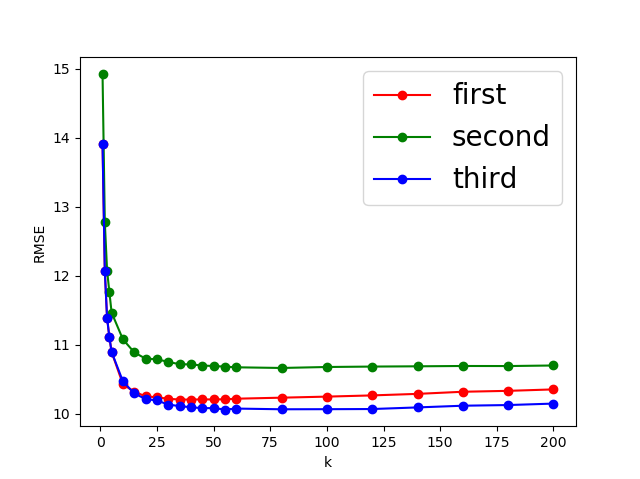

In [16]:
from IPython.display import Image
Image(filename = "tuning_result.png", width = 640, height = 480)

三者得出的結果趨勢幾乎相同(接近平移關係)，而對python內建的knn來說，經過標準化的資料所預測的誤差會比未經標準化的資料來的小，而myknn則是因為有去除極端值的機制，因此預測誤差比上述兩者更小

### 第三題 [Lasso Regression]

### Q3.1

公式推導過程如附圖

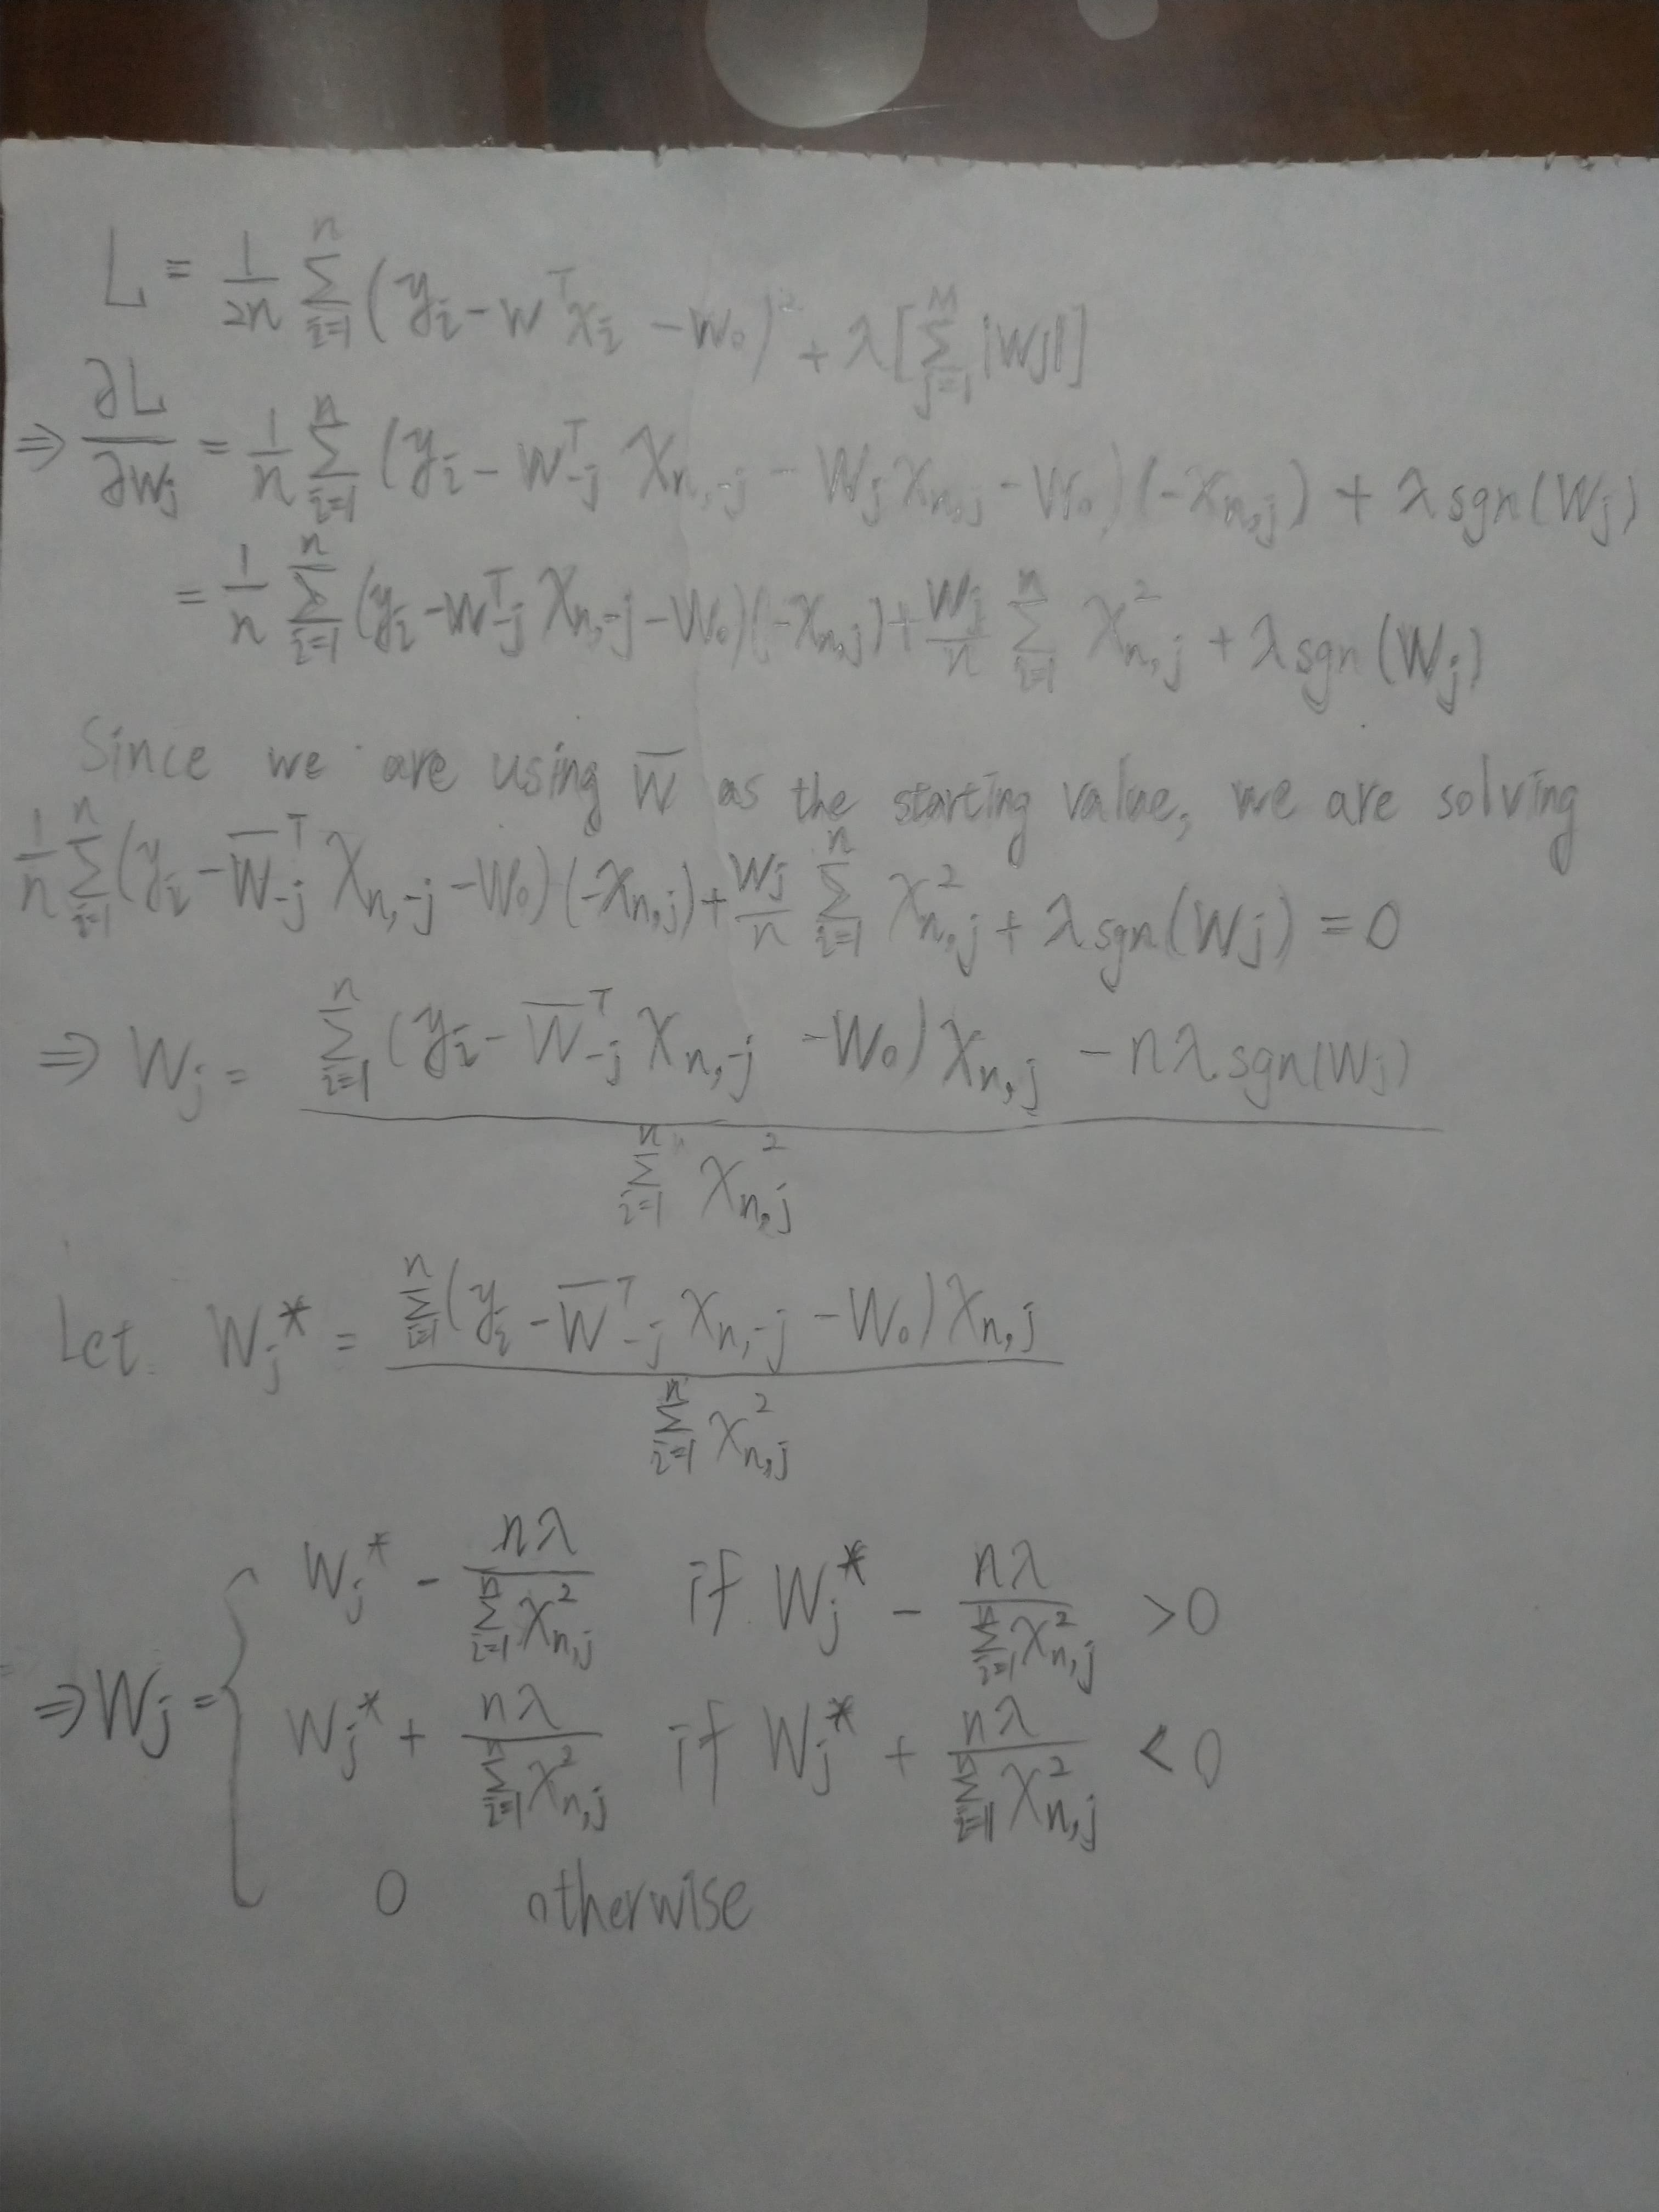

In [1]:
from IPython.display import Image
Image(filename = "formula.jpg", width = 640, height = 480)

### Q3.2 + Q3.3 + Q3.4 

(code難以分割，因此將此三個小題寫在一起) mylasso初始化並讀取所需參數;<br>
function fit : 依照Q3.1推出的公式執行train的動作，找出一個w；輸出Training Loss、Root Mean Squared Error (RMSE) in Training Data、Mean Absolute Error (MAE) in Training Data、Intercept (截距項)、Feature Weights (除了截距項的所有權重)、非零權重的個數;<br>
function predict : 將fit找出的w套用在x_test上，生成預測結果;<br>

In [24]:
import numpy as np
import pickle
from sklearn import preprocessing

class mylasso():
    def __init__(self, lamcoef = 0.1, max_iter=1000, tol=1e-6, const_regu = False):
        """lamcoef: the regularization coefficient
           max_iter: maximum number of iteration for model training
           tol: tolerance for the stopping criteria for model training
           const_regu: whether the constant term should be regularized, default to False"""
        self.lamcoef = lamcoef
        self.max_iter = max_iter
        self.tol = tol
        self.const_regu = const_regu
        nnw = 0 #number of nonzero weights
        aws = 0 #average weight size
        self.ans_w = []
        self.w0 = []

    def fit(self, x_train, y_train, winit = "ridge", keep_traindata = True, verbose = False):
        """Fit a Lasso model
          x_train: a numpy matrix that contains training features
          y_train: a numpy matrix that contains the label
          winit: how weights are initialized, default to "ridge", ridge regression
          keep_traindata: whether the object is going to keep training data after the training process completed
          verbose: output a lot of message"""
        ### Add your code here ###
        n = x_train.shape[0]
        w = self.lamcoef*np.identity(x_train.shape[1])+np.dot(np.transpose(x_train), x_train)
        w = np.linalg.inv(w)
        w = np.dot(w, np.dot(np.transpose(x_train), y_train))
        w0 = np.sum(y_train - np.dot(x_train, w))/len(y_train)
        
        loss_last = np.sum((y_train - np.dot(x_train, w)-w0)**2)/2/n + self.lamcoef * np.sum(np.abs(w))
        loss_now = 0
        
        for i in range(self.max_iter) :
            for j in range(w.shape[0]) :
                wdj = np.delete(w, j, 0)
                xdj = np.delete(x_train, j, 1)
                wjstar = np.sum(np.dot(y_train - np.dot(xdj, wdj) - w0, x_train[:, j]))/np.dot(x_train[:, j], np.transpose(x_train[:, j]))
                if wjstar - n * self.lamcoef / np.sum(np.dot(x_train[:, j], np.transpose(x_train[:, j]))) > 0:
                    w[j] = wjstar - n * self.lamcoef / np.sum(np.dot(x_train[:, j], np.transpose(x_train[:, j])))
                elif wjstar + n * self.lamcoef / np.sum(np.dot(x_train[:, j], np.transpose(x_train[:, j]))) < 0:
                    w[j] = wjstar + n * self.lamcoef / np.sum(np.dot(x_train[:, j], np.transpose(x_train[:, j])))
                else:
                    w[j] = 0
            loss_now = np.sum((y_train - np.dot(x_train, w)-w0)**2)/2/n + self.lamcoef * np.sum(np.abs(w))
            #print("loss_now")
            #print(loss_now)
            if abs(loss_last - loss_now) < self.tol:
                break
            loss_last = loss_now
        self.ans_w = w
        self.w0 = w0
        ### train RMSE
        train_RMSE = 0
        train_MAE = 0
        nonzero_w_cnt = 0
        y_pred_train = np.dot(x_train, self.ans_w)
        train_RMSE += np.sum((y_pred_train + w0 - y_train)**2)
        train_MAE += np.sum(abs(y_pred_train + w0 - y_train))
        train_RMSE /= len(y_train)
        train_RMSE = train_RMSE**0.5
        print("---------Q3.3------------")
        print("train_RMSE")
        print(train_RMSE)
        train_MAE /= len(y_train)
        print("train_MAE")
        print(train_MAE)
        print("w0")
        print(w0) #Intercept
        print("w")
        print(w) #feature_weights 
        for i in range(len(w)):
            if w[i] != 0:
                nonzero_w_cnt +=1
        print(nonzero_w_cnt)
        
    def predict(self, x_test):
        """Make prediction using trained model"""
        return np.dot(x_test, self.ans_w) + self.w0

load資料輸入進mylasso，輸出前五筆資料的預測年分、Test RMSE、Test MAE

In [26]:
np.set_printoptions(suppress=True)
#Load data
with open('msd_data1.pickle', 'rb') as fh1:
    msd_data = pickle.load(fh1)

xscaler = preprocessing.StandardScaler().fit(msd_data['X_train'])
#standardize feature values
x_train_sd = xscaler.transform(msd_data['X_train'])
x_test_sd = xscaler.transform(msd_data['X_test'])

#outcome values
y_train = msd_data['Y_train']
y_test = msd_data['Y_test']

mlo = mylasso(lamcoef = 0.1)
mlo.fit(x_train_sd, y_train)
ypred = mlo.predict(x_test_sd)

test_RMSE = 0
test_MAE = 0
test_RMSE += np.sum((ypred - y_test)**2)
test_MAE += np.sum(np.abs(ypred - y_test))
test_RMSE /= len(ypred)
test_RMSE = test_RMSE**0.5
test_MAE /= len(ypred)

print("---------Q3.4------------")
print("first 5 ypred")
print(ypred[:5])
print("test RMSE")
print(test_RMSE)
print("test MAE")
print(test_MAE)

---------Q3.3------------
train_RMSE
9.719499089084618
train_MAE
6.980898009625377
w0
1998.2660000000003
w
[ 4.6518551  -2.45673153 -1.06195885  0.         -0.34275054 -2.94854329
  0.         -0.39970268 -0.42653866  0.         -0.23498651 -0.39491058
  0.50307719  0.         -0.34207893  0.61674589  0.15722753  0.43489925
  0.43595375  1.12941661  0.40663481  0.          1.77743607  0.
 -0.16842728  0.07833529  0.66391172  0.01297938  0.15350723  0.
 -0.21762074 -0.22189107  0.         -0.0027548  -0.01707674 -0.2599464
  0.          0.28969362  0.34893387  0.         -0.26112569 -0.14488702
 -0.00995271  0.03497723 -0.03984338  0.          0.00299383 -0.17804306
  0.          0.06494382  0.27076506  0.          0.          0.
  0.          0.         -0.63813223  0.23761428 -0.19016387  0.
 -0.18875525  0.         -0.13590668  0.0612754  -0.26619017  0.
  0.          0.         -0.03099184  0.         -0.19276517  0.01221358
  0.20735199  0.25118247  0.12313494  0.          0.      

透過lasso_regression預測得出的train_RMSE大約是9.72, test_RMSE大約是9.65; train_MAE大約是6.98, test_MAE大約是6.92。
對於train和test的資料，預測效果相當接近，沒有overfitting的現象

### Q3.5

mylasso初始化並讀取所需參數
function fit : 對每個lamcoef，依照Q3.1推出的公式執行train的動作，找出一個w；輸出一個包含Training Loss、Root Mean Squared Error (RMSE) in Training Data、Mean Absolute Error (MAE) in Training Data、Intercept (截距項)、Feature Weights (除了截距項的所有權重)、非零權重的個數list
function predict : 將fit找出的w套用在x_test上，生成預測結果
最後整理fit回傳的list，將其畫成折線圖

0.0001
0.0005
0.001
0.005
0.01
0.05
0.1
0.5
1
2


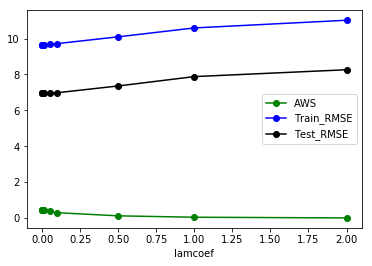

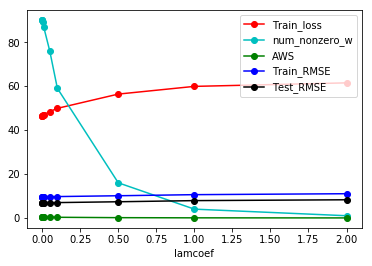

In [33]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn import preprocessing

class mylasso():
    def __init__(self, lamcoef = 0.1, max_iter=1000, tol=1e-6, const_regu = False):
        """lamcoef: the regularization coefficient
          max_iter: maximum number of iteration for model training
          tol: tolerance for the stopping criteria for model training
          const_regu: whether the constant term should be regularized, default to False"""
        self.lamcoef = lamcoef
        self.max_iter = max_iter
        self.tol = tol
        self.const_regu = const_regu
        nnw = 0 #number of nonzero weights
        aws = 0 #average weight size
        self.ans_w = []
        self.w0 = []


    def fit(self, x_train, y_train, winit = "ridge", keep_traindata = True, verbose = False):
        """Fit a Lasso model
          x_train: a numpy matrix that contains training features
          y_train: a numpy matrix that contains the label
          winit: how weights are initialized, default to "ridge", ridge regression
          keep_traindata: whether the object is going to keep training data after the training process completed
          verbose: output a lot of message"""
        n = x_train.shape[0]
        w = self.lamcoef*np.identity(x_train.shape[1])+np.dot(np.transpose(x_train), x_train)
        w = np.linalg.inv(w)
        w = np.dot(w, np.dot(np.transpose(x_train), y_train))
        w0 = np.sum(y_train - np.dot(x_train, w))/len(y_train)
        
        loss_last = np.sum((y_train - np.dot(x_train, w)-w0)**2)/2/n + self.lamcoef * np.sum(np.abs(w))
        loss_now = 0

        for i in range(self.max_iter) :
            for j in range(w.shape[0]) :
                wdj = np.delete(w, j, 0)
                xdj = np.delete(x_train, j, 1)
                wjstar = np.sum(np.dot(y_train - np.dot(xdj, wdj) - w0, x_train[:, j]))/np.dot(x_train[:, j], np.transpose(x_train[:, j]))
                if wjstar - n * self.lamcoef / np.sum(np.dot(x_train[:, j], np.transpose(x_train[:, j]))) > 0:
                    w[j] = wjstar - n * self.lamcoef / np.sum(np.dot(x_train[:, j], np.transpose(x_train[:, j])))
                elif wjstar + n * self.lamcoef / np.sum(np.dot(x_train[:, j], np.transpose(x_train[:, j]))) < 0:
                    w[j] = wjstar + n * self.lamcoef / np.sum(np.dot(x_train[:, j], np.transpose(x_train[:, j])))
                else:
                    w[j] = 0
            loss_now = np.sum((y_train - np.dot(x_train, w)-w0)**2)/2/n + self.lamcoef * np.sum(np.abs(w))
            #print("loss_now")
            #print(loss_now)
            if abs(loss_last - loss_now) < self.tol:
                break
            loss_last = loss_now
        self.ans_w = w
        self.w0 = w0

        record = []
        train_RMSE = 0
        train_MAE = 0
        nonzero_w_cnt = 0

        record.append(loss_now)   #train loss
        
        for i in range(len(w)):
            if w[i] != 0:
                nonzero_w_cnt +=1
        record.append(nonzero_w_cnt)  #Number of Nonzero Weights

        record.append(np.sum(np.abs(w))/len(np.abs(w)))   #Average Weight Size (Mean of Absolute Weight)

        y_pred_train = np.dot(x_train, self.ans_w)
        train_RMSE += np.sum((y_pred_train + w0 - y_train)**2)
        train_RMSE /= len(y_train)
        train_RMSE = train_RMSE**0.5
        record.append(train_RMSE)   #Training RMSE
        
        train_MAE += np.sum(abs(y_pred_train + w0 - y_train))
        train_MAE /= len(y_train)
        record.append(train_MAE)   #Test RMSE

        return record

    def predict(self, x_test):
        """Make prediction using trained model"""
        return np.dot(x_test, self.ans_w) + self.w0

np.set_printoptions(suppress=True)

#Load data
with open('msd_data1.pickle', 'rb') as fh1:
    msd_data = pickle.load(fh1)

xscaler = preprocessing.StandardScaler().fit(msd_data['X_train'])
#standardize feature values
x_train_sd = xscaler.transform(msd_data['X_train'])
x_test_sd = xscaler.transform(msd_data['X_test'])

#outcome values
y_train = msd_data['Y_train']
y_test = msd_data['Y_test']

Train_loss = [] 
num_nonzero_w = []
AWS = []
Train_RMSE = []
Test_RMSE = []

lamcoef_list = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2]
for l in lamcoef_list :
    print(l)
    mlo = mylasso(lamcoef = l)
    record = mlo.fit(x_train_sd, y_train)
    ypred = mlo.predict(x_test_sd)
    Train_loss.append(record[0])
    num_nonzero_w.append(record[1])
    AWS.append(record[2])
    Train_RMSE.append(record[3])
    Test_RMSE.append(record[4])


plt.plot(lamcoef_list, AWS, 'o-', color = 'g', label = "AWS")
plt.plot(lamcoef_list, Train_RMSE, 'o-', color = 'b', label = "Train_RMSE")
plt.plot(lamcoef_list, Test_RMSE, 'o-', color = 'k', label = "Test_RMSE")
plt.legend(loc = "best", fontsize=10)
plt.xlabel('lamcoef') 
plt.show()

plt.plot(lamcoef_list, Train_loss, 'o-', color = 'r', label = "Train_loss")
plt.plot(lamcoef_list, num_nonzero_w, 'o-', color = 'c', label = "num_nonzero_w")
plt.plot(lamcoef_list, AWS, 'o-', color = 'g', label = "AWS")
plt.plot(lamcoef_list, Train_RMSE, 'o-', color = 'b', label = "Train_RMSE")
plt.plot(lamcoef_list, Test_RMSE, 'o-', color = 'k', label = "Test_RMSE")
plt.legend(loc = "best", fontsize=10)
plt.xlabel('lamcoef')
plt.show()


隨著lamcoef的值增加 :
Number of Nonzero Weights明顯下降，符合從Q3.1推出的公式來看，隨著lamcoef增加，Wj != 0 的條件變得越來越嚴苛、wj = 0 的區間變大，因此會有更多的wj = 0 ;<br>
train_loss些許上升，符合由loss公式來看lamcoef增加，會增加train_loss，但同時會影響train wj的結果，因此上升幅度較小;<br>
兩種RMSE都微微上升，符合loss上升，RMSE也上升的趨勢;<br>
Average Weight Size (Mean of Absolute Weight)微微下降，符合更多wj=0的趨勢;<br>